<a href="https://colab.research.google.com/github/MariaPazGallitrico/TelecomX--Challenge2/blob/main/TelecomX_Challenge2-MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📌 EXTRACCIÓN

In [1]:
import requests
import pandas as pd
import numpy as np
from pandas import json_normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1) Cargar y aplanar JSON ---
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
data_json = requests.get(url).json()
df = json_normalize(data_json)


In [2]:
# --- 2) Limpiar nombres de columnas
df.columns = df.columns.str.replace(".", "_").str.strip()

In [3]:
# Convertir a DataFrame
from pandas import json_normalize

df = json_normalize(data_json)

# Vista inicial
print(df.shape)
df.head()


(7267, 21)


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Eliminar ID


In [4]:
if "customerID" in df.columns:
    df = df.drop(columns=["customerID"])

In [5]:
print(df.shape)
df.head()

(7267, 20)


,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


Limpiar datos


In [6]:
df["Churn"] = df["Churn"].replace("", np.nan)

In [7]:
df = df[df["Churn"].isin(["Yes", "No"])].copy()

In [8]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

Separo X-Y

In [9]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

One-hot encoding

In [10]:
X_encoded = pd.get_dummies(X, drop_first=True)

Separar

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Verificar proporción

In [13]:

(y.value_counts(normalize=True) * 100).round(2)

,proportion
Churn,
0,73.46
1,26.54


Estandarización

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Verificar que funciono la estandarización**
Dado que se utilizará un modelo basado en regresión logística, se aplicó estandarización a las variables mediante StandardScaler, ajustando el escalador únicamente con el conjunto de entrenamiento para evitar data leakage.

In [15]:
import numpy as np

print(np.mean(X_train_scaled, axis=0)[:5])
print(np.std(X_train_scaled, axis=0)[:5])

[ 1.40523158e-17 -8.93583157e-17 -1.69708737e-16 -3.45903157e-17
 -3.24284210e-17]
[1. 1. 1. 1. 1.]


Análisis de Correlación

In [23]:
df_model = pd.concat([X_encoded, y], axis=1)

In [24]:
corr_churn = df_model.select_dtypes(
    include=["int64","float64","uint8"]
).corr()["Churn"].sort_values(ascending=False)

corr_churn.head(10)

,Churn
Churn,1.000000
account.Charges.Monthly,0.193356
customer.SeniorCitizen,0.150889
customer.tenure,-0.352229


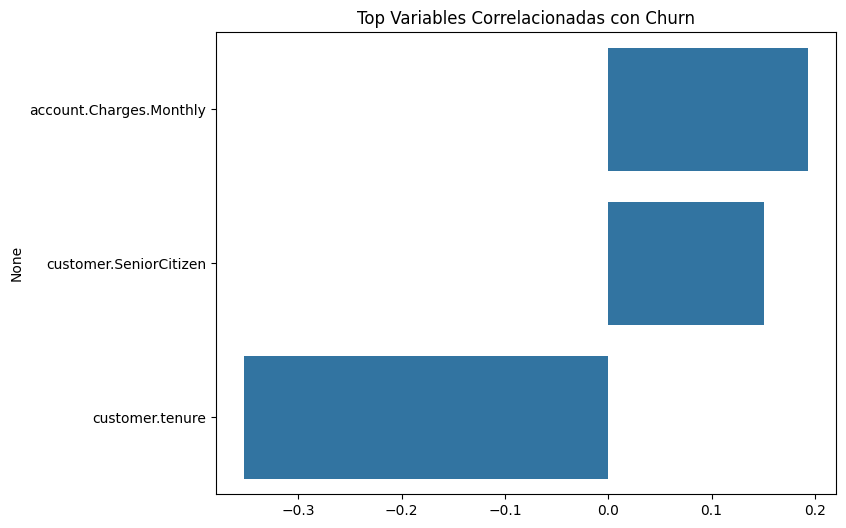

In [25]:
top_corr = corr_churn[1:11]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top Variables Correlacionadas con Churn")
plt.show()

Análisis Dirigido

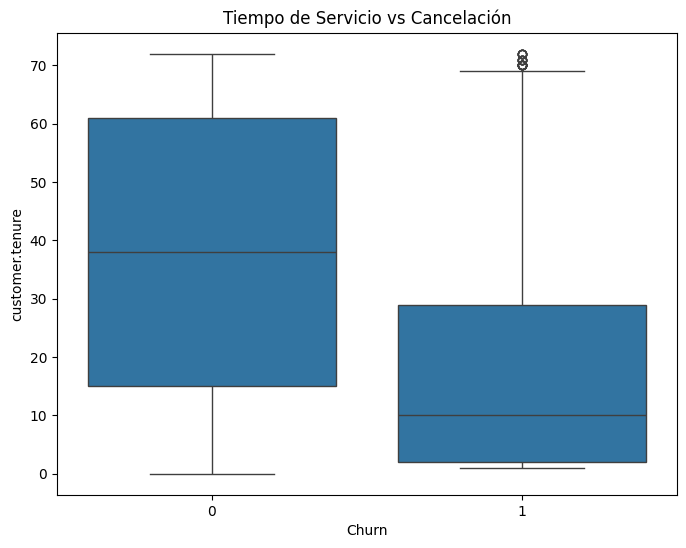

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x="Churn", y="customer.tenure", data=df)
plt.title("Tiempo de Servicio vs Cancelación")
plt.show()

#Si los que cancelan (1) tienen tenure más bajo:Significa que el churn ocurre más en clientes nuevos

 Divido en 70% para entrenamiento y 30% para prueba

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

Verifico división

In [29]:
print("Train proportion:")
print(y_train.value_counts(normalize=True))

print("\nTest proportion:")
print(y_test.value_counts(normalize=True))

Train proportion:
Churn
0    0.734686
1    0.265314
Name: proportion, dtype: float64

Test proportion:
Churn
0    0.734501
1    0.265499
Name: proportion, dtype: float64


MODELO 1 - Régresion Logística

In [30]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix - Logistic Regression")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report")
print(classification_report(y_test, y_pred_log))

Confusion Matrix - Logistic Regression
[[1388  164]
 [ 316  245]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1552
           1       0.60      0.44      0.51       561

    accuracy                           0.77      2113
   macro avg       0.71      0.67      0.68      2113
weighted avg       0.76      0.77      0.76      2113



MODELO 2 — Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [33]:
print("Confusion Matrix - Random Forest")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix - Random Forest
[[1402  150]
 [ 304  257]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1552
           1       0.63      0.46      0.53       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113



EVALUACION DE LOS MODELOS

En churn queremos maximizar recall de clase 1. Actualmente:

Regresión detecta 44% de los clientes que se van

Random Forest detecta 46%

👉 Ambos modelos aún dejan escapar más del 50% de churners.

In [37]:
y_train_pred = rf_model.predict(X_train)
y_test_pred  = rf_model.predict(X_test)

print("Train accuracy:", accuracy_score(y_train, y_train_pred))
print("Test accuracy:", accuracy_score(y_test, y_test_pred))

Train accuracy: 0.9977687626774848
Test accuracy: 0.7851396119261713


In [38]:
y_train_pred_log = log_model.predict(X_train_scaled)
y_test_pred_log  = log_model.predict(X_test_scaled)

print("Train accuracy:", accuracy_score(y_train, y_train_pred_log))
print("Test accuracy:", accuracy_score(y_test, y_test_pred_log))

Train accuracy: 0.9898580121703854
Test accuracy: 0.7728348319924279


Ambos modelos presentan una diferencia significativa entre desempeño en entrenamiento y prueba (~21 puntos porcentuales), lo que sugiere presencia de sobreajuste (overfitting).Esto puede deberse al alto número de variables generadas tras el encoding y a la complejidad del modelo frente al tamaño del dataset.

🔵 1️⃣ Regresión Logística — Coeficientes

Coeficiente positivo → aumenta probabilidad de churn

Coeficiente negativo → reduce probabilidad de churn

Cuanto mayor el valor absoluto → mayor impacto

In [40]:
import pandas as pd

coefficients = pd.DataFrame({
    "Variable": X_train.columns,
    "Coeficiente": log_model.coef_[0]
})

coefficients["Abs_Coef"] = coefficients["Coeficiente"].abs()

coefficients_sorted = coefficients.sort_values(by="Abs_Coef", ascending=False)

coefficients_sorted.head(10)

,Variable,Coeficiente,Abs_Coef
1,customer.tenure,-1.064332,1.064332
27,account.PaymentMethod_Electronic check,0.969913,0.969913
14,internet.OnlineBackup_Yes,-0.815997,0.815997
23,account.Contract_One year,-0.801141,0.801141
24,account.Contract_Two year,-0.745616,0.745616
22,internet.StreamingMovies_Yes,0.684541,0.684541
28,account.PaymentMethod_Mailed check,0.597855,0.597855
25,account.PaperlessBilling_Yes,0.546530,0.546530
26,account.PaymentMethod_Credit card (automatic),0.498792,0.498792
12,internet.OnlineSecurity_Yes,-0.479687,0.479687


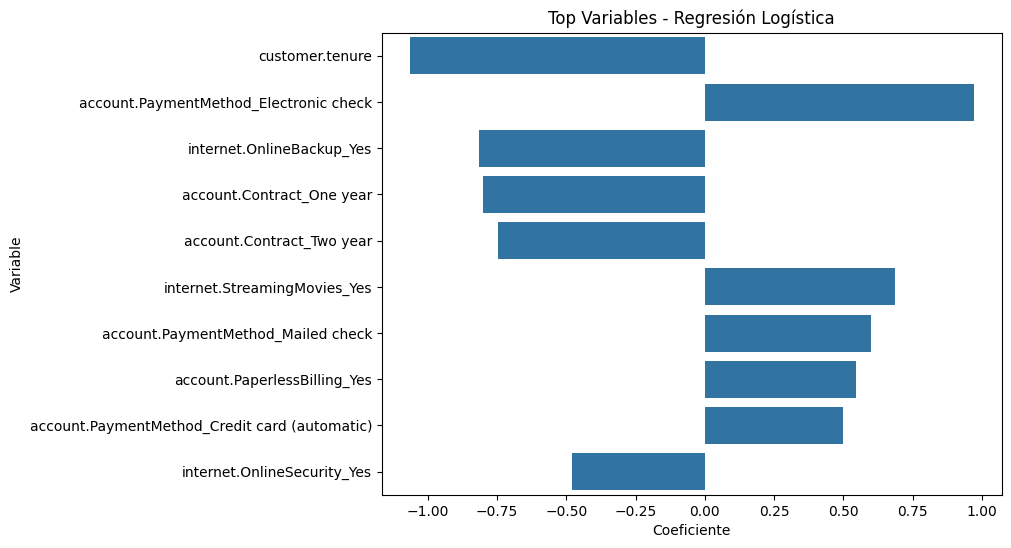

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

top_coef = coefficients_sorted.head(10)

plt.figure(figsize=(8,6))
sns.barplot(x="Coeficiente", y="Variable", data=top_coef)
plt.title("Top Variables - Regresión Logística")
plt.show()

🌳 2️⃣ Random Forest — Feature Importance

In [42]:
importances = pd.DataFrame({
    "Variable": X_train.columns,
    "Importancia": rf_model.feature_importances_
})

importances_sorted = importances.sort_values(by="Importancia", ascending=False)

importances_sorted.head(10)

,Variable,Importancia
1,customer.tenure,0.121254
2,account.Charges.Monthly,0.093815
24,account.Contract_Two year,0.029503
27,account.PaymentMethod_Electronic check,0.027869
9,internet.InternetService_Fiber optic,0.026510
18,internet.TechSupport_Yes,0.024187
23,account.Contract_One year,0.023377
12,internet.OnlineSecurity_Yes,0.021961
25,account.PaperlessBilling_Yes,0.020856
3,customer.gender_Male,0.019219


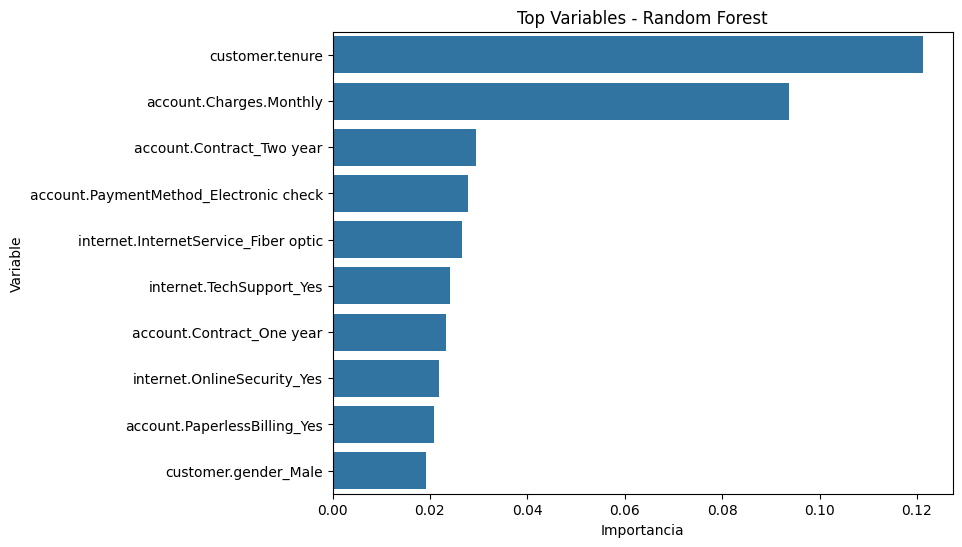

In [43]:
top_importances = importances_sorted.head(10)

plt.figure(figsize=(8,6))
sns.barplot(x="Importancia", y="Variable", data=top_importances)
plt.title("Top Variables - Random Forest")
plt.show()

🎯 Conclusión final

🔵 Regresión Logística

Los coeficientes muestran que las variables relacionadas con el tipo de contrato mensual y menor antigüedad del cliente incrementan la probabilidad de cancelación. Por el contrario, contratos de mayor duración y mayor permanencia reducen significativamente el riesgo de churn.

🌳 Random Forest

El modelo Random Forest confirma que el tiempo de permanencia (tenure) y el tipo de contrato son las variables más influyentes en la predicción. Esto refuerza la hipótesis de que el churn ocurre principalmente en clientes con menor estabilidad contractual